In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


None

In [4]:
display(df.head())

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [5]:
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'], errors='coerce')

/var/folders/b8/g_81576s72zfp5rvhj0rrtjw0000gn/T/ipykernel_71661/872009929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'], errors='coerce')


In [6]:
missing_values = df.isnull().sum()
display(missing_values)

Order ID                       0
Customer ID                    0
Platform                       0
Order Date & Time          60089
Delivery Time (Minutes)        0
Product Category               0
Order Value (INR)              0
Customer Feedback              0
Service Rating                 0
Delivery Delay                 0
Refund Requested               0
dtype: int64

In [7]:
df['Delivery Delay'] = df['Delivery Delay'].map({'Yes': 1, 'No': 0})
df['Refund Requested'] = df['Refund Requested'].map({'Yes': 1, 'No': 0})

In [8]:
display(df.describe())

,Order Date & Time,Delivery Time (Minutes),Order Value (INR),Service Rating,Delivery Delay,Refund Requested
count,39911,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2025-03-15 11:59:33.833529600,29.536140,590.994400,3.240790,0.136720,0.458190
min,2025-03-15 00:29:30,5.000000,50.000000,1.000000,0.000000,0.000000
25%,2025-03-15 05:29:30,23.000000,283.000000,2.000000,0.000000,0.000000
50%,2025-03-15 11:29:30,30.000000,481.000000,3.000000,0.000000,0.000000
75%,2025-03-15 18:29:30,36.000000,770.000000,5.000000,0.000000,1.000000
max,2025-03-15 23:29:30,76.000000,2000.000000,5.000000,1.000000,1.000000
std,NaN,9.958933,417.409058,1.575962,0.343553,0.498251


In [9]:
df.isnull().sum()

Order ID                       0
Customer ID                    0
Platform                       0
Order Date & Time          60089
Delivery Time (Minutes)        0
Product Category               0
Order Value (INR)              0
Customer Feedback              0
Service Rating                 0
Delivery Delay                 0
Refund Requested               0
dtype: int64

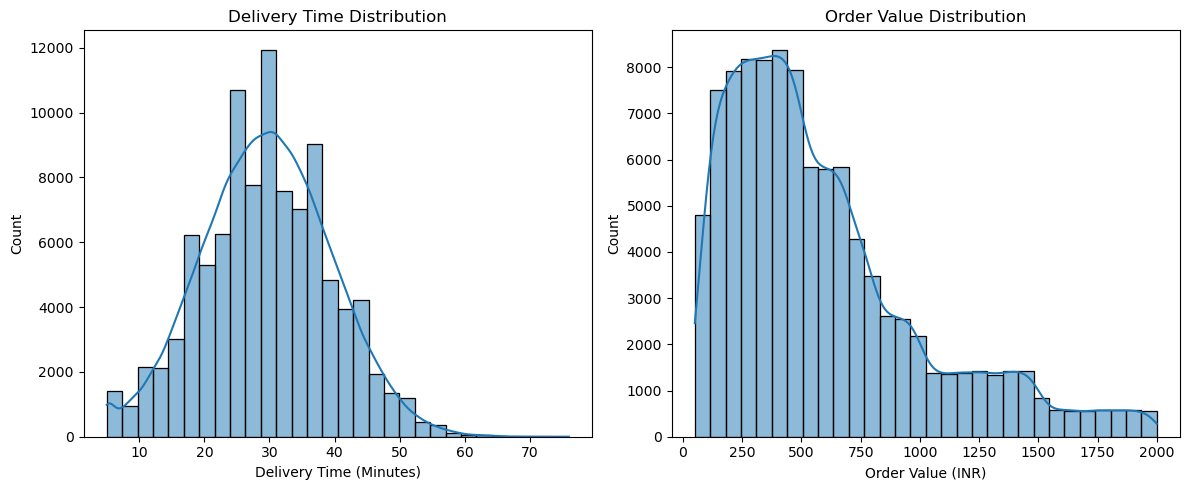

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Delivery Time (Minutes)'], bins=30, kde=True, ax=axes[0]).set_title("Delivery Time Distribution")
sns.histplot(df['Order Value (INR)'], bins=30, kde=True, ax=axes[1]).set_title("Order Value Distribution")
plt.tight_layout()
plt.show()

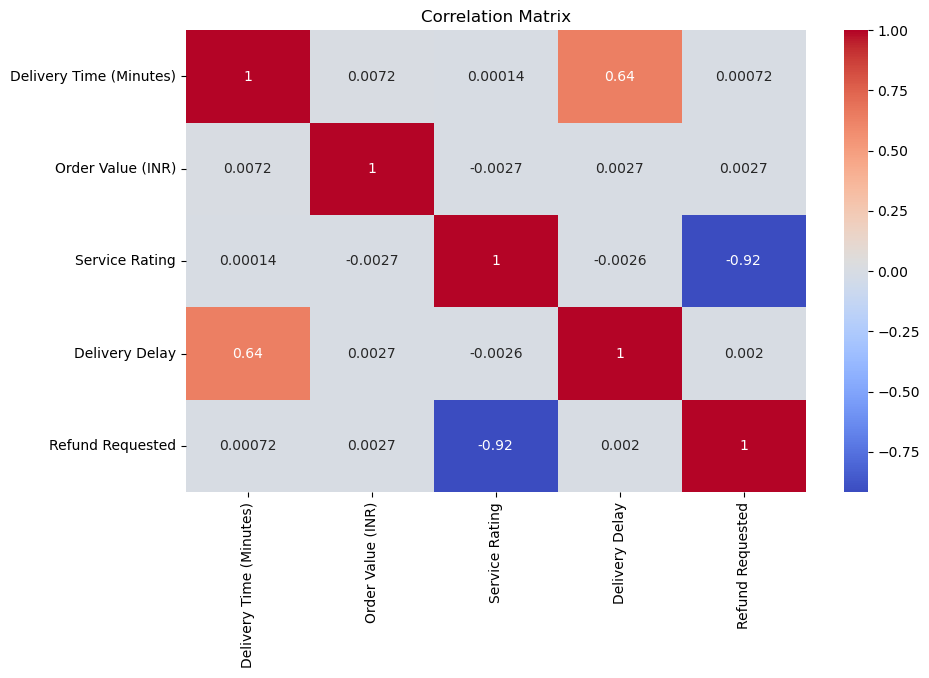

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

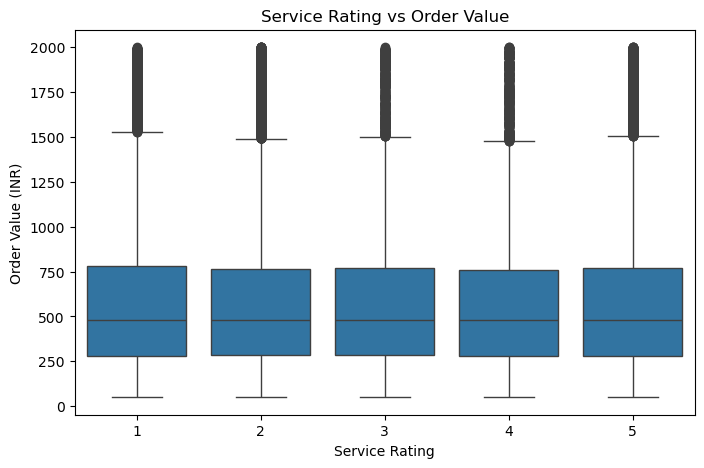

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Service Rating'], y=df['Order Value (INR)'])
plt.title("Service Rating vs Order Value")
plt.show()

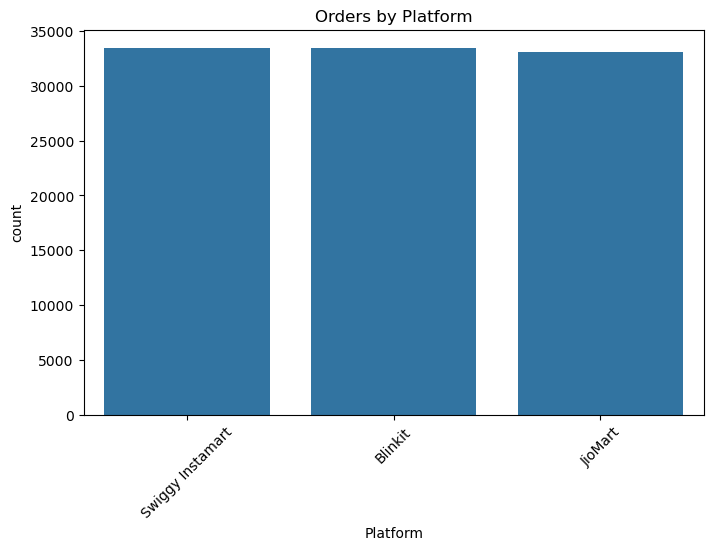

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Platform'], order=df['Platform'].value_counts().index)
plt.title("Orders by Platform")
plt.xticks(rotation=45)
plt.show()


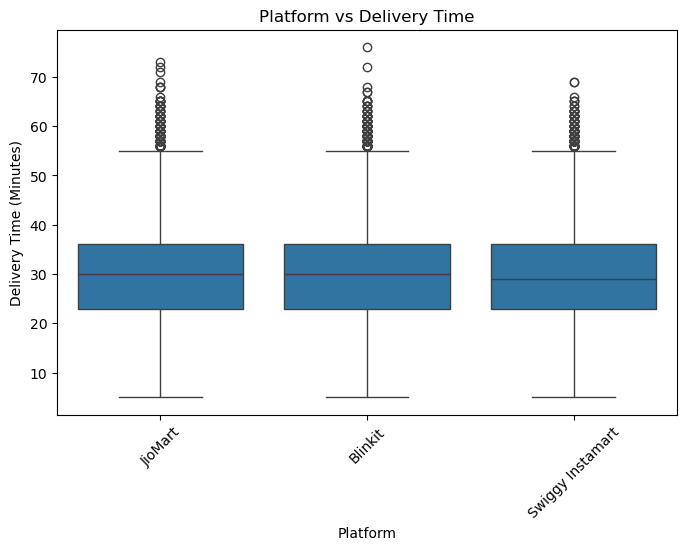

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Platform'], y=df['Delivery Time (Minutes)'])
plt.title("Platform vs Delivery Time")
plt.xticks(rotation=45)
plt.show()


In [15]:
print(df.columns)


Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')


In [21]:
df.columns = df.columns.str.strip()  # Remove spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
print(df.columns)  # Check updated names


Index(['Order_ID', 'Customer_ID', 'Platform', 'Order_Date_&_Time',
       'Delivery_Time_(Minutes)', 'Product_Category', 'Order_Value_(INR)',
       'Customer_Feedback', 'Service_Rating', 'Delivery_Delay',
       'Refund_Requested'],
      dtype='object')


In [25]:
df['Product_Category'] = df['Product_Category'].fillna("Unknown")


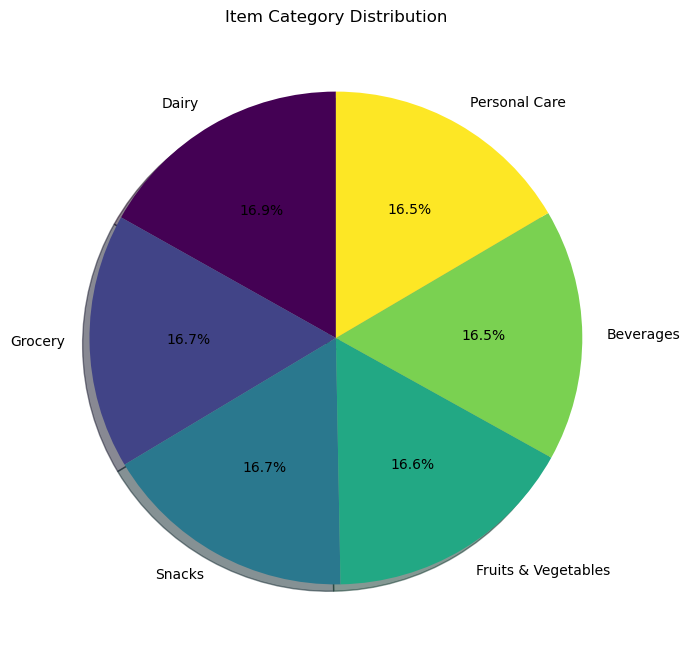

In [27]:
if 'Product_Category' in df.columns:
    plt.figure(figsize=(8, 8))
    df['Product_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', shadow=True)
    plt.title("Item Category Distribution")
    plt.ylabel("")
    plt.show()
else:
    print("Column 'Product_Category' not found in DataFrame!")


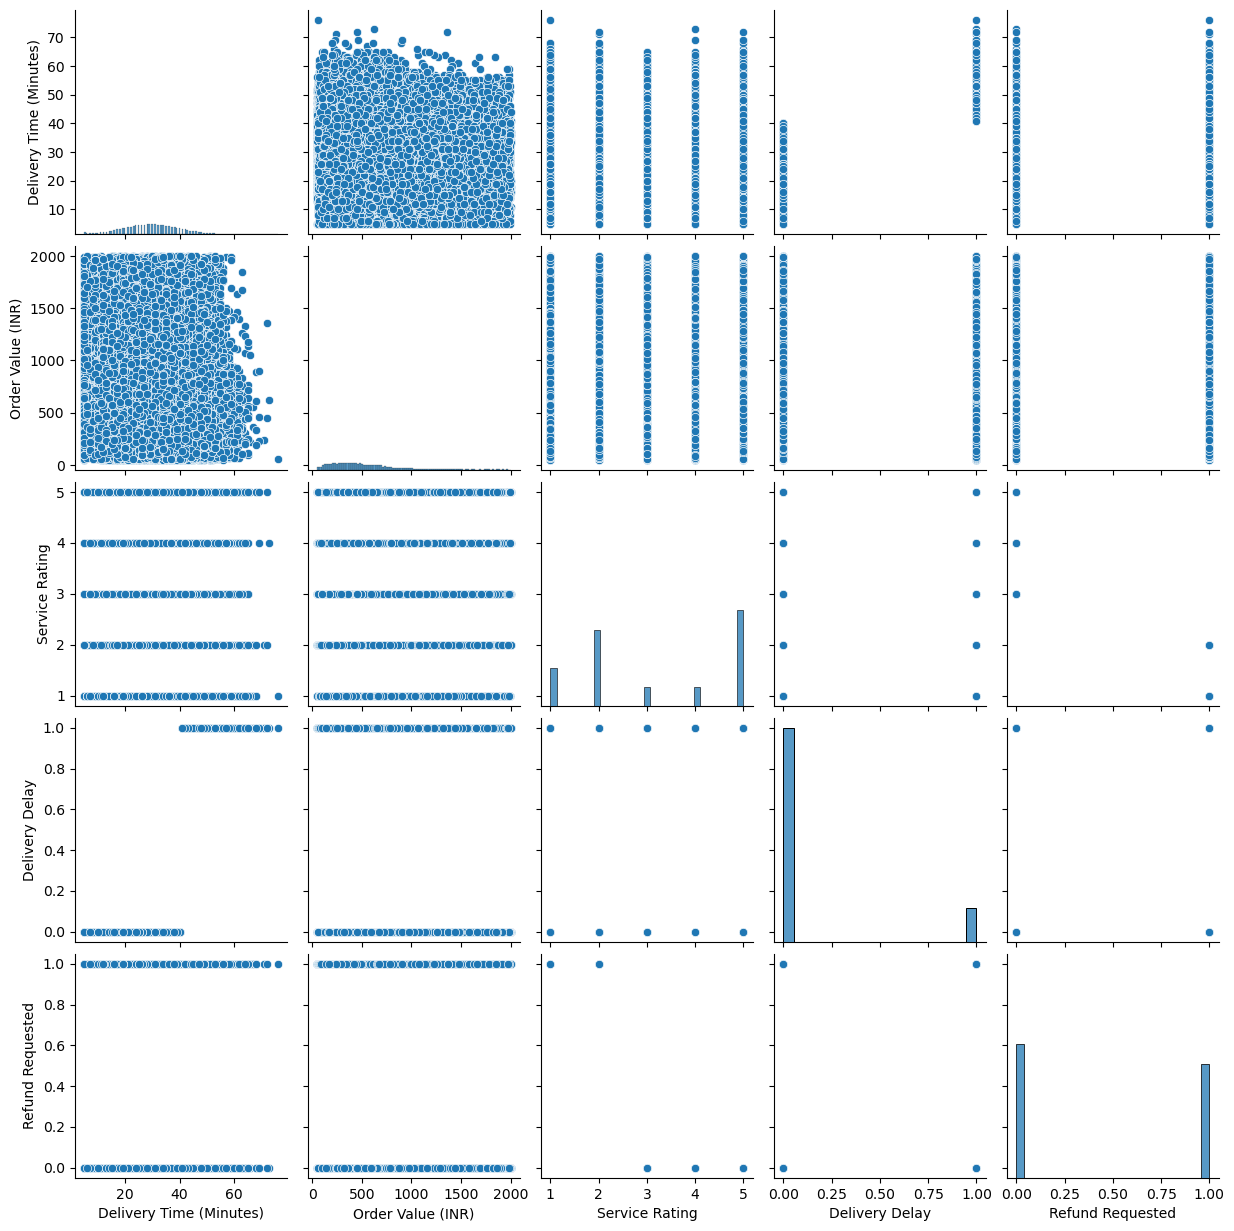

In [17]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

In [30]:
key_insights = '''
1. *Delivery Time Distribution*: Most deliveries take 20-40 minutes.
2. *Order Value vs. Rating*: Higher order values tend to receive better ratings.
3. *Platform & Delivery Time Variation*: Different platforms show different delivery time patterns.
4. *Missing Data in Order Date & Time*: 60% missing values need handling.
5. *Refund Request & Delays*: Needs further analysis to determine patterns.
'''
print(key_insights)



1. *Delivery Time Distribution*: Most deliveries take 20-40 minutes.
2. *Order Value vs. Rating*: Higher order values tend to receive better ratings.
3. *Platform & Delivery Time Variation*: Different platforms show different delivery time patterns.
4. *Missing Data in Order Date & Time*: 60% missing values need handling.
5. *Refund Request & Delays*: Needs further analysis to determine patterns.

